In [1]:
rootF = 'D:/Data/Paper defocus/'

In [2]:
import os as os
import sys
import numpy as np
import pandas as pd
from scipy.stats import linregress

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib.gridspec import SubplotSpec
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

from shared.save_load import load_obj, save_obj

In [3]:
experiments = [20211129, 20211207, 20211208, 20221213, 20221214, 20230105]

# Experiment conditions
from shared.parameters_stimulation2 import *
pixel_size_um = 3.5
pixel_per_check = 12
nb_checks = 60

mouse_dF_to_um_ratio = -5 #um
mouse_offset = np.linspace(40,-40,9) * mouse_dF_to_um_ratio
images = ['1','2','3','5']

# Load data

In [4]:
path_to_original_images = rootF + '/Eye model simulations/original images/'

### LSC and mean intensity

#### 4 images experiments

In [5]:
local_spatial_contrast_all_exps = []
mean_intensity_all_exps = []

for iExp in range(len(experiments)):
    exp = experiments[iExp]

    local_contrasts = load_obj(rootF + 'contrast analysis/local_contrast_2sigma_liu2022_exp' + str(exp) + '.pkl')
    mean_intensities = load_obj(rootF + '/contrast analysis/mean_intensities_2sigma_liu2022_exp' + str(exp) + '.pkl')
    print (exp, local_contrasts.shape)
    
    local_spatial_contrast_all_exps.append(local_contrasts)
    mean_intensity_all_exps.append(mean_intensities)

20211129 (68, 4, 2, 4, 9)
20211207 (112, 4, 2, 4, 9)
20211208 (113, 4, 2, 4, 9)
20221213 (56, 4, 2, 4, 9)
20221214 (81, 4, 2, 4, 9)
20230105 (143, 4, 2, 4, 9)


#### Varying SA

In [12]:
simulation = 'Rem20240325_MouseSA'

# Simulation parameters
path_to_PSFs = rootF + "/Eye model simulations/mouse PSFs/" + simulation + "/"

# Load job ids and optical conditions
simulation_parameters = pd.read_csv(path_to_PSFs + 'JMfile.csv', sep=";")
JobIds = simulation_parameters['JobId'].values
# eye SA
eye_SA_all = simulation_parameters['c04tg'].values
eye_SAs = np.unique(eye_SA_all)
# pup diams
pup_diam_all = simulation_parameters['pupDiam_mm'].values
pup_diams = np.unique(pup_diam_all)
# source eccentricity
sources_ecc_all = simulation_parameters['sourceEccen_deg'].values
sources_ecc = np.unique(sources_ecc_all)
# foveal defocus
offset_file = pd.read_csv(path_to_PSFs + 'offset.csv', sep=";")
offset_diopter = offset_file['defoc_diopter'].values
offset_diopter_idx = offset_file['Index'].values

print (len(JobIds), 'jobs in simulation', simulation)
print ('Spherical aberrations:', eye_SAs)
print ('Pup diams:', pup_diams)
print ('Source ecc:', sources_ecc)
print ('Foveal defocus:', offset_diopter)

NSA = len(eye_SAs)
Ndfs = len(offset_diopter)
Npup = len(pup_diams)
NsrcEcc = len(sources_ecc)

mouse_dF_to_um_ratio = -5 #um
mouse_offset = np.linspace(40,-40,9) * mouse_dF_to_um_ratio

48 jobs in simulation Rem20240325_MouseSA
Spherical aberrations: [0.   0.15 0.45 0.6 ]
Pup diams: [0.8 1.4 1.5]
Source ecc: [ 0 10 20 30]
Foveal defocus: [ 40.  30.  20.  10.  -0. -10. -20. -30. -40.]


In [8]:
local_spatial_contrast_SA_all_exps = []
mean_intensity_SA_all_exps = []

for iExp in range(len(experiments)):
    exp = experiments[iExp]

    local_contrasts = load_obj(rootF + 'contrast analysis/' + simulation + '_local_contrast_2sigma_liu2022_exp' + str(exp) + '.pkl')
    mean_intensities = load_obj(rootF + '/contrast analysis/' + simulation + '_mean_intensities_2sigma_liu2022_exp' + str(exp) + '.pkl')
    print (exp, local_contrasts.shape)
    
    local_spatial_contrast_SA_all_exps.append(local_contrasts)
    mean_intensity_SA_all_exps.append(mean_intensities)

20211129 (68, 4, 4, 3, 4, 9)
20211207 (112, 4, 4, 3, 4, 9)
20211208 (113, 4, 4, 3, 4, 9)
20221213 (56, 4, 4, 3, 4, 9)
20221214 (81, 4, 4, 3, 4, 9)
20230105 (143, 4, 4, 3, 4, 9)


### Selected cells

In [9]:
cells_clustering_all_experiments = []

for iExp in range(len(experiments)):
    exp = experiments[iExp]

    cells_clustering = load_obj(rootF + '/MEA/exp' + str(exp) + '/' + str(exp) + '_selected_cells_clustering')
    cells_clustering = np.array(cells_clustering)
    cells_clustering_all_experiments.append(cells_clustering)
    print (exp, len(cells_clustering))

20211129 68
20211207 112
20211208 113
20221213 56
20221214 81
20230105 143


In [10]:
# Skipped cells because of bad ellipse fitting

skip_cells = np.array([[45, 80, 188, 192, 401, 408, 422, 525, 533, 558, 561, 614, 682], 
                       [33, 52, 145, 302, 340, 406, 414, 515],
                       [99,100,276,407,424,452,472,498],
                       [55, 180, 232, 294, 339, 365, 563, 570, 665, 680],
                       [40, 190, 332, 957],
                       [15, 96, 177, 221, 274, 320, 326, 389, 498, 558, 571, 689, 700, 791, 832, 856, 923, 928, 1018]], 
                      dtype='object')  

# Figure

460
Total cell number: 511.0
0 0 2011
0 3 204
2 0 1113
2 3 262


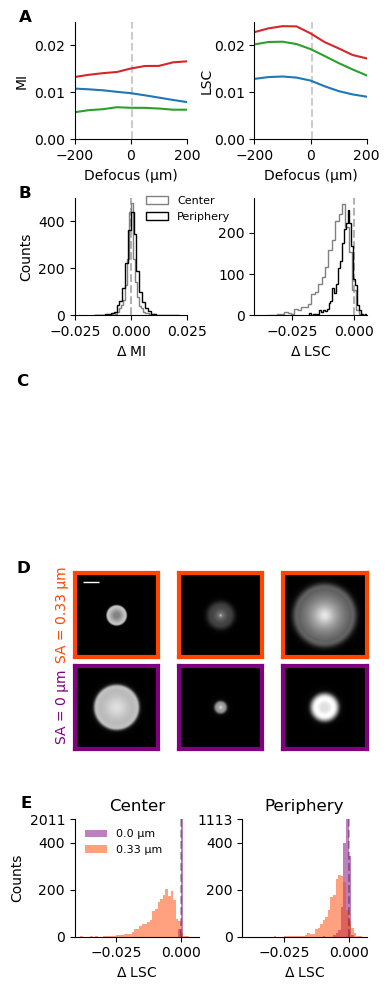

In [13]:
cols = ['C0','C1','C2','C3']
colors = ['grey', 'black']
SA_colors = ['purple', 'orangered']
retina_ecc = ['Center', 'Periphery']
retina_ecc_deg = ['0°', '20°']
true_eye_SAs = [0.0, 0.33]

idx_ref = 2

fig = plt.figure(figsize=(4,10))
GS = fig.add_gridspec(4, 1, height_ratios = [2.5,1,1.5,1])

########################################### LSC, MI ######################################################

iPup_exp = 0
iEcc = 2

gs = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=GS[0], wspace = 0.6, hspace = 0.5)

#### Example cell
iExp = 2
exp = experiments[iExp]
cell_nb = 460 
index = np.where(cells_clustering_all_experiments[iExp] == cell_nb)[0][0]
print (cell_nb)

### Mean intensity vs defocus
ax = fig.add_subplot(gs[0,0])
ax.axvline(4, ymin=0, ymax=12, color='k', ls='--', alpha=0.2)
for iImg in [0,2,3]:
    ax.plot(mouse_offset, mean_intensity_all_exps[iExp][index,iImg,iPup_exp,iEcc,:], color=cols[iImg])
ax.set_ylim(0, 0.025)
ax.set_xlim(-200, 200)
ax.set_yticks([0,0.01,0.02])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('MI')
ax.set_xlabel('Defocus (µm)')
ax.text(-400, 0.025, 'A', color='k', fontsize = 12, weight='bold')

### Local contrast vs defocus
ax = fig.add_subplot(gs[0,1])
ax.axvline(4, ymin=0, ymax=12, color='k', ls='--', alpha=0.2)
for iImg in [0,2,3]:
    ax.plot(mouse_offset, local_spatial_contrast_all_exps[iExp][index,iImg,iPup_exp,iEcc,:], color=cols[iImg], \
                label='image {}'.format(images[iImg]))
ax.set_ylim(0, 0.025)
ax.set_xlim(-200,200)
ax.set_yticks([0,0.01,0.02])
ax.set_ylabel('LSC', labelpad=0)
ax.set_xlabel('Defocus (µm)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

##### Population

### MI
ax = fig.add_subplot(gs[1,0])
ax.axvline(0, color='k',ls='--',alpha=0.3)
for src in [0,2]:    
    delta_contrast = []
    for iExp in range(len(experiments)):
        for index in range(len(cells_clustering_all_experiments[iExp])):
            cell_nb = cells_clustering_all_experiments[iExp][index]
            if cell_nb not in skip_cells[iExp]:
                for iImg in range(Nimgs):
                    delta_contrast.append(mean_intensity_all_exps[iExp][index,iImg,iPup_exp,src,-1]- \
                                          mean_intensity_all_exps[iExp][index,iImg,iPup_exp,src,idx_ref])
    ax.hist(delta_contrast, bins=30, histtype='step', stacked=True, color=colors[int(src/2)], \
               label = retina_ecc[int(src/2)])
ax.set_ylabel('Counts')
ax.set_xlabel('$\Delta$ MI')
ax.set_xlim(-0.025,0.025)
ax.set_ylim(0, 500)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(frameon=False, fontsize=8, bbox_to_anchor=(0.545, 1.1))
ax.text(-0.05, 500, 'B', color='k', fontsize = 12, weight='bold')
    
# ### LSC
N = 0
ax = fig.add_subplot(gs[1,1])
ax.axvline(0, color='k',ls='--',alpha=0.3)
for src in [0,2]:    
    delta_contrast = []
    for iExp in range(len(experiments)):
        for index in range(len(cells_clustering_all_experiments[iExp])):
            cell_nb = cells_clustering_all_experiments[iExp][index]
            if cell_nb not in skip_cells[iExp]:
                N += 1
                for iImg in range(Nimgs):
                    delta_contrast.append(local_spatial_contrast_all_exps[iExp][index,iImg,iPup_exp,src,-1]- \
                                          local_spatial_contrast_all_exps[iExp][index,iImg,iPup_exp,src,idx_ref])
    ax.hist(delta_contrast, bins=30, histtype='step', stacked=True, color=colors[int(src/2)], \
               label = retina_ecc[int(src/2)])
ax.set_xlabel('$\Delta$ LSC')
ax.set_xlim(-0.04,0.005)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

print ('Total cell number:', N/2)

#################################### SPHERICAL ABERRATIONS #########################################

iPup = 1
iEcc_psf = 0
pup = pup_diams[iPup]
ecc = sources_ecc[iEcc_psf]

##### Blank space for illustration

gs = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=GS[1])

ax = fig.add_subplot(gs[0])
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.axis('off')
ax.text(-0.2, 1, 'C', color='k', fontsize = 12, weight='bold')

##### Plots

gs = gridspec.GridSpecFromSubplotSpec(2, 3, subplot_spec=GS[2], wspace = 0.25, hspace=0.1)

##### PSFs
iSA = 3
eye_SA = eye_SAs[iSA]
# JobId
job_id = int(JobIds[np.where((simulation_parameters['c04tg'] == eye_SA) & \
                      (simulation_parameters['pupDiam_mm'] == pup) & \
                      (simulation_parameters['sourceEccen_deg'] == ecc))[0]][0])
for idF in [0,4,8]:
    dF = offset_diopter[idF]
    psf = np.load(path_to_PSFs + '/polychromatic_PSF_Job' + \
                str(job_id).zfill(6) + '_offset{}'.format(idF) +'.npy') 
    ax = fig.add_subplot(gs[0,int(idF/4)])
    ax.imshow(np.log(psf+1), origin='lower',cmap='gray')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlim(128, 512-128)
    ax.set_ylim(128, 512-128)
    if idF == 0:
        ax.set_ylabel('SA = {} µm'.format(true_eye_SAs[int(iSA/2)]), color='orangered')
        ax.text(-50, psf.shape[0]-128, 'D', color='k', fontsize = 12, weight='bold')
    ax.spines['bottom'].set_color('orangered')
    ax.spines['top'].set_color('orangered')
    ax.spines['left'].set_color('orangered')
    ax.spines['right'].set_color('orangered')
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    
    # Scale bar
    if idF == 0:
        scalebar = AnchoredSizeBar(ax.transData, 50, '', 'upper left',pad=0.5,color='white',frameon=False, sep=5, \
                       size_vertical=2)
        ax.add_artist(scalebar)

iSA = 0
eye_SA = eye_SAs[iSA]
job_id = int(JobIds[np.where((simulation_parameters['c04tg'] == eye_SA) & \
                      (simulation_parameters['pupDiam_mm'] == pup) & \
                      (simulation_parameters['sourceEccen_deg'] == ecc))[0]][0])
for idF in [0,4,8]:
    dF = offset_diopter[idF]
    psf = np.load(path_to_PSFs + '/polychromatic_PSF_Job' + \
                str(job_id).zfill(6) + '_offset{}'.format(idF) +'.npy') 
    ax = fig.add_subplot(gs[1,int(idF/4)])
    ax.imshow(np.log(psf+1), origin='lower',cmap='gray')
    ax.set_xlim(128, 512-128)
    ax.set_ylim(128, 512-128)
    ax.set_yticks([])
    ax.set_xticks([])
    if idF == 0:
        ax.set_ylabel('SA = 0 µm', color='purple')
    ax.spines['bottom'].set_color('purple')
    ax.spines['top'].set_color('purple')
    ax.spines['left'].set_color('purple')
    ax.spines['right'].set_color('purple')
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)

##### Histos delta LSC

gs = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=GS[3], wspace = 0.35)

lim_inf = -0.041
lim_sup = 0.007
bin_size = 0.001
n_bins = int((lim_sup-lim_inf)/bin_size)
bins = np.arange(lim_inf, lim_sup,bin_size)

for iEcc in [0,2]:
    ax = fig.add_subplot(gs[int(iEcc/2)])
    ax.set_title(retina_ecc[int(iEcc/2)])
    ax.axvline(0, color='k',ls='--',alpha=0.3)
    for iSA in [0,3]:
        delta_contrast = []
        for iExp in range(len(experiments)): 
            for index in range(len(cells_clustering_all_experiments[iExp])):
                cell_nb = cells_clustering_all_experiments[iExp][index]
                if cell_nb not in skip_cells[iExp]:
                    for iImg in range(Nimgs):
                        delta_contrast.append(local_spatial_contrast_SA_all_exps[iExp][index,iSA,iImg,iPup,iEcc,-1]- \
                                        local_spatial_contrast_SA_all_exps[iExp][index,iSA,iImg,iPup,iEcc,idx_ref])
        ax.hist(delta_contrast, bins=bins, color=SA_colors[int(iSA/2)], alpha=0.5,\
               label = '{} µm'.format(true_eye_SAs[int(iSA/2)]))
        print (iEcc, iSA, max(np.histogram(np.array(delta_contrast), bins=bins)[0]))
    ax.set_xlabel('$\Delta$ LSC')
    ax.set_xlim(lim_inf, lim_sup)
    ax.set_ylim(0, 500)
    ax.set_yticks([0,200,400,500])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if iEcc == 0:
        ax.text(-0.062, 550, 'E', color='k', fontsize = 12, weight='bold')
        ax.set_ylabel('Counts')
        ax.set_yticklabels(['0', '200', '400', '2011'])
        ax.legend(frameon=False, fontsize = 8)
    else:
        ax.set_yticklabels(['0', '200', '400', '1113'])

plt.tight_layout()
plt.show()
    
### Save figure
fsave = 'T:/Documents/Papier defocus/figures/papier/'
# fig.savefig(fsave+'Fig5_raw_v2.png', format='png', dpi=300)